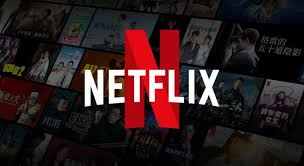

# **NETFLIX**




**1. INTRODUCTION**

Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages.Launched in 2007, nearly a decade after Netflix, Inc. began its pioneering DVD-by-mail movie rental service, Netflix is the most-subscribed video on demand streaming media service, with 301.6 million paid memberships in more than 190 countries as of 2025

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statistics import mode
from collections import Counter
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [241]:
!gdown 1YBHze870AfyyD65lVCnyP74lLzg7ztLYO39rb3KvzkE

Downloading...
From (original): https://drive.google.com/uc?id=1YBHze870AfyyD65lVCnyP74lLzg7ztLYO39rb3KvzkE
From (redirected): https://docs.google.com/spreadsheets/d/1YBHze870AfyyD65lVCnyP74lLzg7ztLYO39rb3KvzkE/export?format=xlsx
To: /content/NETFLIX BUSINESS CASE.xlsx
1.74MB [00:00, 149MB/s]


In [242]:
df = pd.read_excel('NETFLIX BUSINESS CASE.xlsx')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [243]:
df.shape

(8807, 12)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [245]:
df.describe()

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [246]:
df.describe(include=object)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,17,220,514,8775
top,s8807,Movie,2025-02-09 00:00:00,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,3207,1793,362,4


In [247]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [248]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [249]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**1.1. REPLACING NULL VALUES WITH 'UNKNOWN' FOR SPECIFIC ANALYSIS AND IMPLEMENTATION**

In [250]:
replace_director = df['director'].fillna("Unknown", inplace = True)
replace_cast = df['cast'].fillna("Unknown", inplace = True)
replace_country = df['country'].fillna("Unknown", inplace = True)
replace_rating = df['rating'].fillna("Unknown", inplace = True)
replace_duration = df['duration'].fillna("Unknown", inplace = True)
replace_date_added = df['date_added'].fillna("Unknown", inplace = True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20 00:00:00,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01 00:00:00,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**1.2. SPLITTING UNNESTED COLUMNS FOR CONVENIENT ANALYSIS**

In [251]:
df_cast = df.copy()
df_cast['cast'] = df_cast['cast'].str.split(',')
df_cast = df_cast.explode('cast')
df_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown,Thabang Molaba,South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [252]:
df_genre = df.copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(',')
df_genre = df_genre.explode('listed_in')
df_genre.value_counts('listed_in').head(10)

,count
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
International TV Shows,774
Independent Movies,736
TV Dramas,696


**2. DATA ANALYSIS AND VISUALIZATION**

Analyzing the Netflix dataset will help in exploring trends in Movies and TV shows, such as release patterns, genre popularity, and regional distributions. By visualizing this data—using bar charts for top genres, line graphs for release trends over time and much more-we can uncover insights into viewer preferences and Netflix’s content strategy.

**2.1. CLASSIFICATION OF CONTENT**

The content created and uploaded on Netflix is classified on the basis of the type of content below with the help of a barplot. Observations and suggestions related to the same are specified.

**INSIGHTS:**

1. Movies are being produced and released more which indicates that Netflix is prioritizing more of a cinematic experience to its audience.
2. Movies have a comparatively shorter engagement and easier licensing due to which it is the leading content type.

**RECOMMENDATIONS:**

1. Can add a "Movie of the Week" to drive attention and quick engagement.
2. Can partner with studios for early streaming rights.(eg: 30 days after release)


Text(0, 0.5, 'Availability')

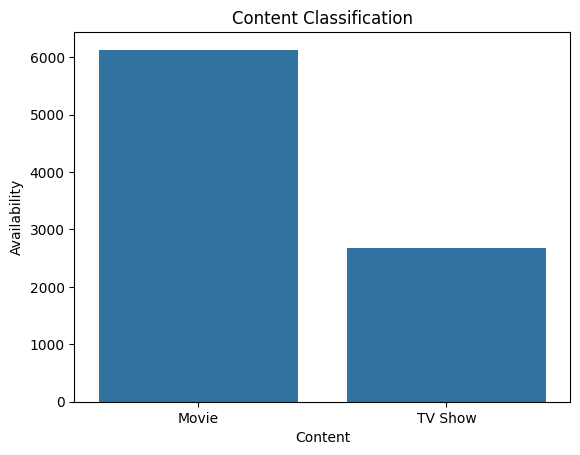

In [253]:
bar_type = sns.countplot(data=df, x='type')
bar_type.set_title('Content Classification')
bar_type.set_xlabel('Content')
bar_type.set_ylabel('Availability')

**2.2. TOP 10 GENRES ON NETFLIX ON THE BASIS OF AVAILABILITY**

The genres of all types of content is classified below on the basis of content availability/creation with the help of a barplot. Observations and suggestions related to the same are specified.

**INSIGHTS:**

1. International Movies is the most created and uploaded content genre with a count of more than 2500 movies being produced.This indicates that Netflix is investing more in global content to diverse its market.
2. The high presence of Comedies and Documentaries genre indicate a strong demand for non-fiction content by the audience.

**RECOMMENDATIONS:**

1. Netflix can go for a remake of the contents under all popular genres in local languages.
2. Develop content with merged top genres.(eg: International Thriller Dramas)
3. Can add a "Top Genre of the Week" on the Homepage.

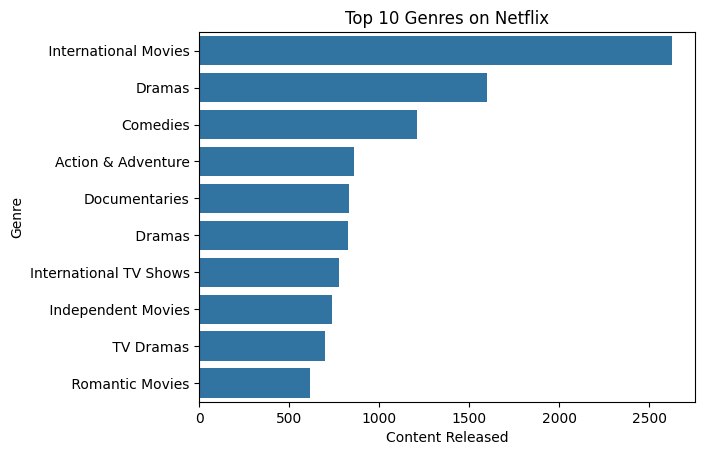

In [254]:
top_genres = df_genre['listed_in'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Content Released')
plt.ylabel('Genre')
plt.show()

**2.3. TOP COUNTRIES WITH MOST CONTENT**

The top 10 countries with most content created and released by Netflix is classified below with the help of a barplot.The plot resembles top 10 countries with most content production classified on the basis of content type(i.e Movies and TV Shows).

**INSIGHTS:**

1. US, India and UK are the top countries likely leading in production .
2. Japan and South Korea are more focused on producing TV Shows(eg: anime, K-Drama).
3. Egypt is present in top 5 but does not produce TV Shows at all.

**RECOMMENDATIONS:**

1. Licensing more of Indian Bollywood movies will generate great revenue.
2. Investing more in K-Dramas, anime and British crime series can be equally profitable.

Text(0, 0.5, 'Country')

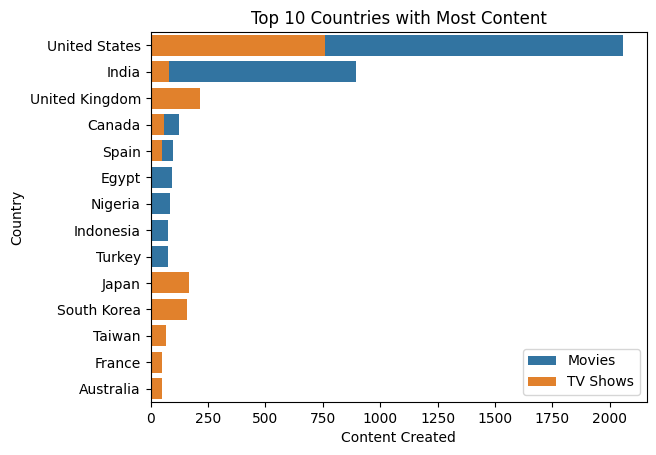

In [255]:
movies = df[df['type'] == 'Movie']
shows = df[df['type'] == 'TV Show']
top_movies_countries = movies['country'].value_counts().drop('Unknown').head(10)
top_shows_countries = shows['country'].value_counts().drop('Unknown').head(10)
sns.barplot(x=top_movies_countries.values, y=top_movies_countries.index, label='Movies')
sns.barplot(x=top_shows_countries.values, y=top_shows_countries.index, label='TV Shows')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Content Created')
plt.ylabel('Country')

**2.4. YEAR-WISE CONTENT RELEASE DISTRIBUTION**

The year wise distribution of content released throughout is showcased below with the help of a barplot.

**INSIGHTS:**

1. Most amount of content was released in the year 2018 with a count of more than 1200 TV Shoes and Movies being produced and released.
2. The period between 2018-2020s was at the peak of production.

**RECOMMENDATIONS:**

1. Renewing of top performing originals can help retain customers.
2. Remastering old films with improved picture quality.
3. Create a "Fresh & Trending" on the Homepage to attract young audience.

Text(0, 0.5, 'Content Released')

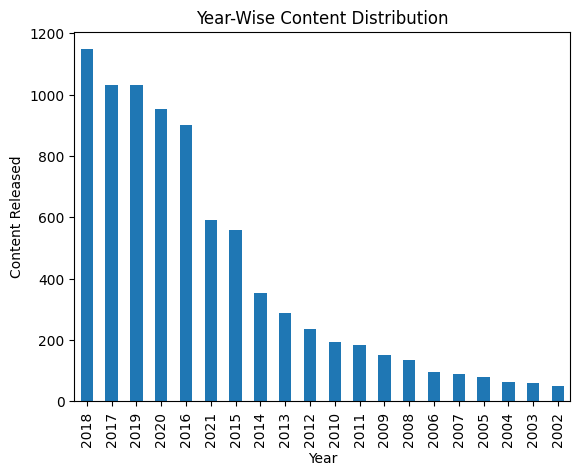

In [256]:
df['release_year'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Year-Wise Content Distribution')
plt.xlabel('Year')
plt.ylabel('Content Released')

**2.5. MONTH-WISE CONTENT DISTRIBUTION**

The month-wise distribution of content released throughout is showcased below with the help of a table and a barplot. Both represent the month-wise distribution with count of content released throughout.

**INSIGHTS:**

1. Most of the content is released in the month of July followed by December and April.
2. Low content release in May and February could be due to streaming drops.

**RECOMMENDATIONS:**

1. New Seasons can be released in peak months.
2. "Hidden Gems" promotions during low-output months.
3. Can also add a "Flashback February" on the Homepage featuring all old hits.

In [257]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()

In [258]:
movies_per_month = df[df['type'] == 'Movie'].groupby('month_name').size().rename('movies_per_month')
tv_show_per_month = df[df['type'] == 'TV Show'].groupby('month_name').size().rename('tv_show_per_month')
merge_content_month = pd.merge(movies_per_month, tv_show_per_month, on='month_name', how='outer').fillna(0)
merge_content_month

,movies_per_month,tv_show_per_month
month_name,,
April,550,214
August,519,236
December,547,266
February,382,181
January,546,192
July,565,262
June,492,236
March,529,213
May,439,193


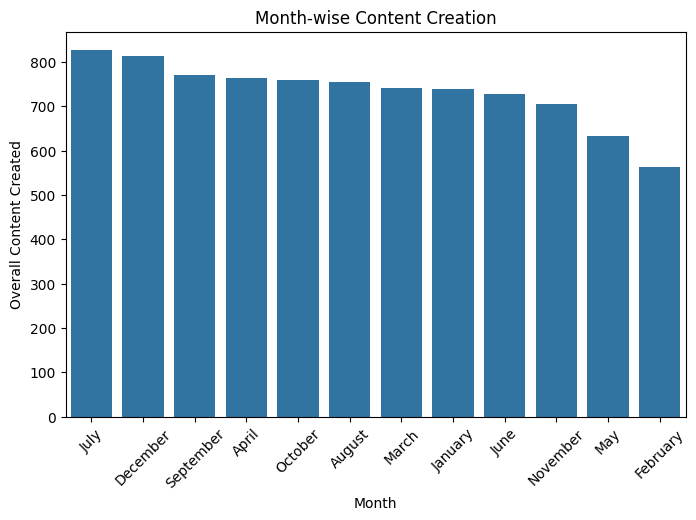

In [259]:
month_counts = df['month_name'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Month-wise Content Creation')
plt.xlabel('Month')
plt.ylabel('Overall Content Created')
plt.xticks(rotation=45)
plt.show()

**2.6. WEEK-WISE CONTENT DISTRIBUTION**

The week-wise distribution of content released throughout is showcased below with the help of a table and a barplot. Both represent the week-wise distribution with count of content released throughout.

**INSIGHTS:**

1. Highest content production is in week 1 (i.e month of January) followed by week 44 and week 40 respectively(i.e November and October).

**RECOMMENDATIONS:**

1. Add Events like "Netflix Premier Week", "Hidden Gems Week".
2. Create special designs for peak week releases.
3. Shift 15-20% of peak week content to adjacent weeks to maintain momentum.

In [260]:
df['date_added']=pd.to_datetime(df['date_added'],errors = 'coerce')
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_week'] = df['date_added'].dt.isocalendar().week

In [261]:
movies_per_week = df[df['type'] == 'Movie'].groupby('release_week').size().rename('movie_count')
tvshows_per_week = df[df['type'] == 'TV Show'].groupby('release_week').size().rename('tv_show_count')
merge_content = pd.merge(tvshows_per_week, movies_per_week, on='release_week', how='outer').fillna(0)
merge_content

,tv_show_count,movie_count
release_week,,
1,56,316
2,30,78
3,32,81
4,32,56
5,73,135
6,33,64
7,41,106
8,38,72
9,47,207


Text(0, 0.5, 'Content Created')

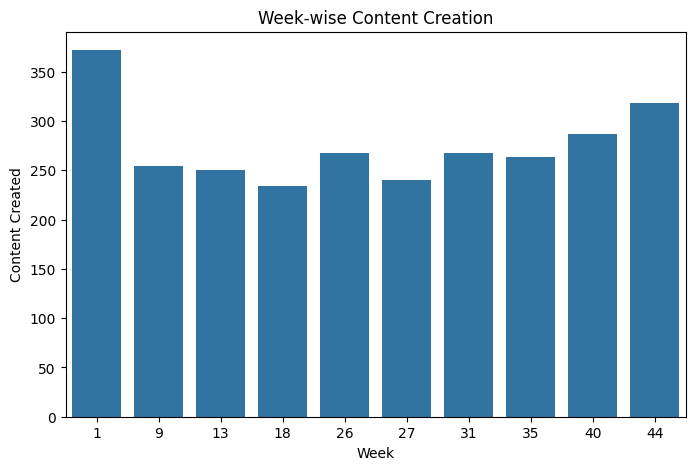

In [262]:
week_counts = df['release_week'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize = (8,5))
sns.barplot(x=week_counts.index, y=week_counts.values)
plt.title('Week-wise Content Creation')
plt.xlabel('Week')
plt.ylabel('Content Created')

**2.7. FREQUENCY OF TV SHOWS RELEASED PER YEAR**

The frequency of release of Tv Shows throughout each year is represented below with the help of two visual representations including a barplot and a linplot. The barplot helps in understanding each year TV Shows release data frequency for the top 10 years with most content while the lineplot helps in understanding the trends throughout for each year.

**INSIGHTS:**

1. The years 2020, 2019 and 2018 are dominating the plot resembling peak years in content production. The reasons could be increased competition in market(eg: Amazon Prime Video, Disney+, HBO Max, etc..), high demand or an aggressive expansion strategy.
2. The drop at year 2021 could be due to pandemic-related production delays.

**RECOMMENDATIONS:**

1. Analyze the genre for most released content in peak years and invest more in them.
2. Increase producing original content to avoid dependency on third-party shows.
3. Shift budgets from low-performing genres to high-growth ones.

Text(0, 0.5, 'Release Frequency')

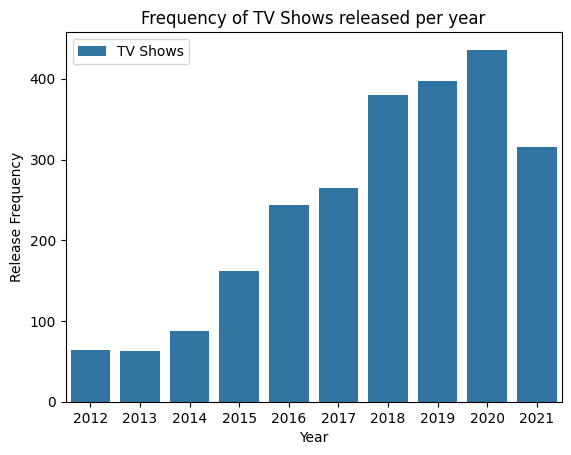

In [263]:
TV_Show_freq = df[df['type'] == 'TV Show']['release_year'].value_counts().head(10)
sns.barplot(x=TV_Show_freq.index, y=TV_Show_freq.values, label='TV Shows')
plt.title('Frequency of TV Shows released per year')
plt.xlabel('Year')
plt.ylabel('Release Frequency')

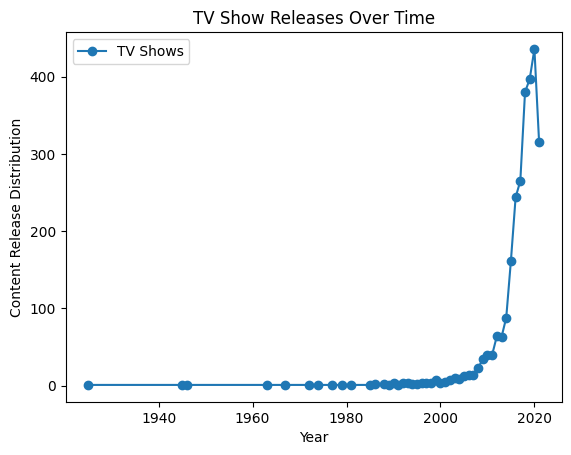

In [264]:
yearly_tv = df[df['type'] == 'TV Show']['release_year'].value_counts().sort_index()
yearly_tv.plot(kind='line', marker='o', title='TV Show Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Content Release Distribution')
plt.legend(['TV Shows'])

**2.8. FREQUENCY OF MOVIES RELEASED PER YEAR**

The frequency of release of Movies throughout each year is represented below with the help of two visual representations including a barplot and a linplot. The barplot helps in understanding each year Movies release data frequency for the top 10 years with most content while the lineplot helps in understanding the trends throughout for each year.

**INSIGHTS:**

1. The decline of content at the years 2020 and later could be due to production delays because of pandemic.
2. A rise on content during peak years 2017, 2018 and 2019 could be due to high demand or increased market competition.

**RECOMMENDATIONS:**

1. Analyze which genres dominated peak years and invest more in them.
2. Leverage Nostalgia with "Throwback" Collections like "90s Classics" or "2010s Blockbusters".

Text(0.5, 1.0, 'Frequency of Movies released per year')

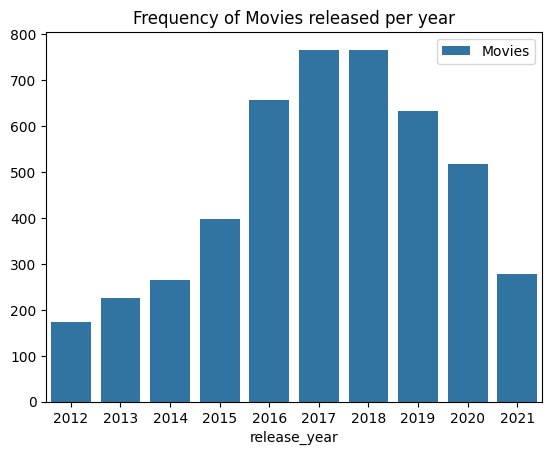

In [265]:
df[df['type'] == 'Movie']['release_year'].value_counts()
Movie_freq = df[df['type'] == 'Movie']['release_year'].value_counts().head(10)
sns.barplot(x=Movie_freq.index, y=Movie_freq.values, label='Movies')
plt.title('Frequency of Movies released per year')

Text(0, 0.5, 'Movies Released')

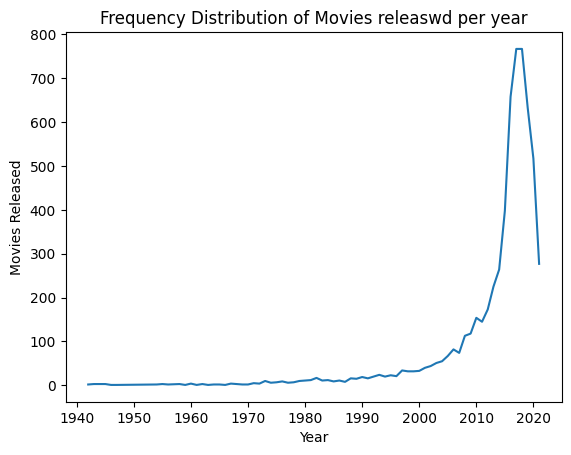

In [266]:
df[df['type'] == 'Movie']['release_year'].value_counts().sort_index().plot()
plt.title('Frequency Distribution of Movies releaswd per year')
plt.xlabel('Year')
plt.ylabel('Movies Released')

**2.9. TOP 10 MOVIE DIRECTORS WITH MOST DIRECTED CONTENT**

The list of top 10 directors with most produced content is listed below and depicted with the help of a barplot.

**INSIGHTS:**

1. Most movies producing director is 'Rajiv Chilaka' with more than 20 movies directed.
2. Top 10 movie directors consist of all male directors worldwide.

**RECOMMENDATIONS:**

1. Sign exclusive deals with top directors to increase platform audience.
2. Partner with female and LGBTQ+ to broaden appeal.
3. Recruit directors from high-growth directors.

In [267]:
df['director_list'] = df['director'].str.split(',')
df = df.explode('director_list')
df['director_list']

,director_list
0,Kirsten Johnson
1,Unknown
2,Julien Leclercq
3,Unknown
4,Unknown
...,...
8802,David Fincher
8803,Unknown
8804,Ruben Fleischer
8805,Peter Hewitt


In [268]:
top_movie_directors = (df[df['type'] == 'Movie']['director_list'].value_counts().head(10).drop('Unknown'))
top_movie_directors

,count
director_list,
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
Jay Karas,15
Marcus Raboy,15
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12


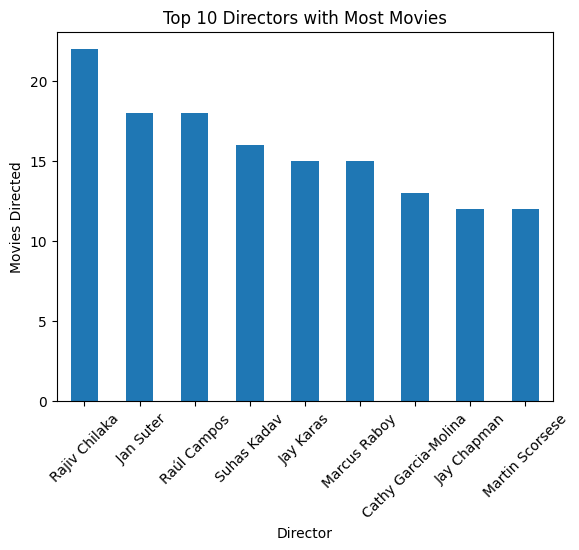

In [269]:
top_movie_directors.plot(kind='bar')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Director')
plt.ylabel('Movies Directed')
plt.xticks(rotation=45)
plt.show()

**2.10. TOP 10 TV SHOW DIRECTORS WITH MOST DIRECTED CONTENT**

The list of top 10 directors with most produced content is listed below and depicted with the help of a barplot.

**INSIGHTS:**

1. Directors like "Ken Burns" and "Alastair Fothergill" dominate the plot with most TV show producing directors.
2. Top 10 movie directors consist of all male directors worldwide.

**RECOMMENDATIONS:**

1. Sign exclusive deals to secure top directors for future seasons.
2. Hire directors from high-growth markets.
3. Partner with female directors for fresh perspectives.

In [270]:
top_tv_show_directors = (df[df['type'] == 'TV Show']['director_list'].value_counts().head(10).drop('Unknown'))
top_tv_show_directors

,count
director_list,
Ken Burns,3
Alastair Fothergill,3
Shin Won-ho,2
Gautham Vasudev Menon,2
Jung-ah Im,2
Iginio Straffi,2
Rob Seidenglanz,2
Stan Lathan,2
Hsu Fu-chun,2


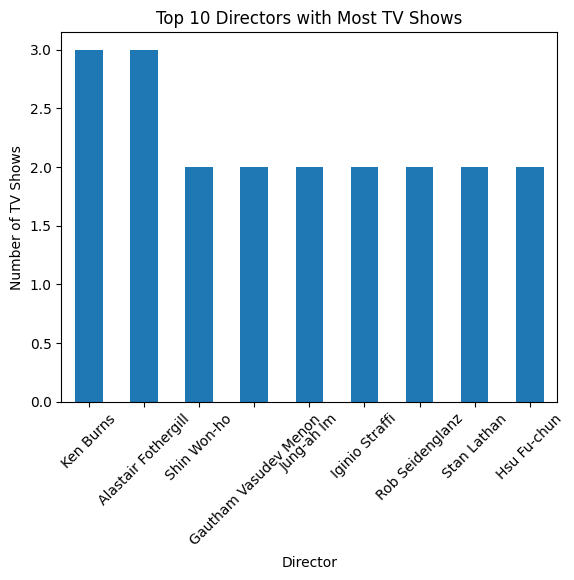

In [271]:
top_tv_show_directors.plot(kind='bar')
plt.title('Top 10 Directors with Most TV Shows')
plt.xlabel('Director')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.show()

**2.11. RATING DISTRIBUTION BY MOVIES AND TV SHOWS**

The distribution of Movies and TV Shows with respect to movie ratings is represented below with the help of a countplot.

**INSIGHTS:**

1. TV-MA is dominating the plot indicating strong demand for adult-oriented content.
2. TV-14 is also prevalent that requires focus on teen/young adult audiences.
3. G and NC-17 ratings are rare maybe due to limited kids' content and niche-adult films.

**RECOMMENDATIONS:**

1. Produce more TV-MA shows high engagement from adult viewers.
2. Invest in content that is under-served in competitor segments.
3. Expand TV-14/PG-13 movies for family-friendly appeal.

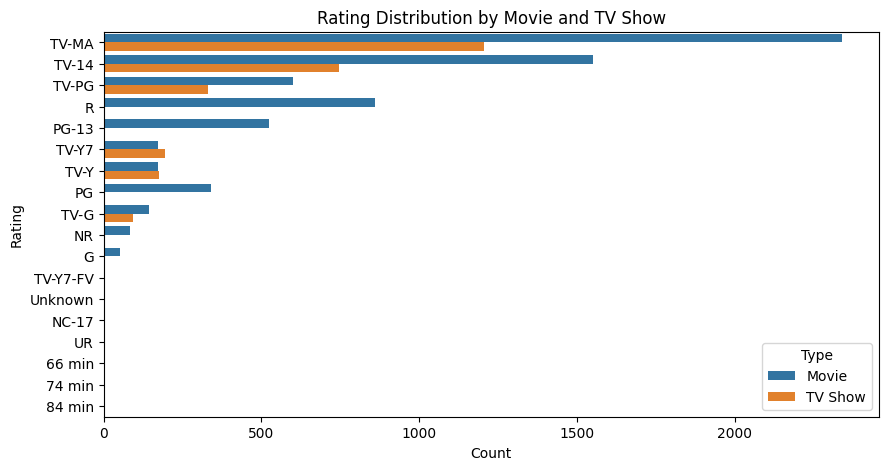

In [272]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='rating', hue='type', order=df['rating'].value_counts().index)
plt.title("Rating Distribution by Movie and TV Show")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.legend(title="Type",loc='lower right')
plt.show()

**2.12.MOST COMMON GENRES**

This word cloud visualization reveals the most frequently occurring genres in your streaming platform's content library. Here are the key insights and strategic recommendations.

**INSIGHTS**

1. Larger words like International Movies, TV Shows, Dramas and Comedies suggest as platform's core content pillars.
2.International Dramas and Action & Adventure appear prominently, indicating strong secondary categories.

**RECOMMENDATIONS:**

1. Produce more originals in dominant categories to meet audience demand.
2. Invest in smaller but high-engagement genres
3. If Horror or Sci-Fi are missing, consider licensing/purchasing content in these genres. Use genre popularity to improve recommendation algorithms.



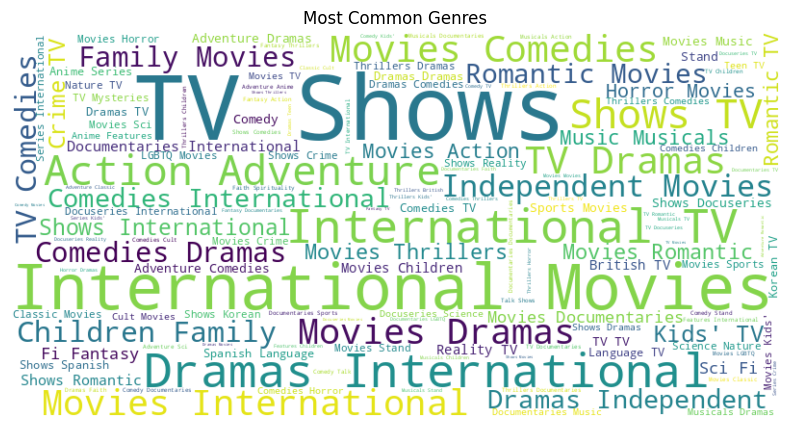

In [273]:
text = " ".join(df_genre['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Genres")
plt.show()

**2.13. GENRE POPULARITY V/S AVAILABILITY**

The refined analysis of growth market genre data is stated below with actionable insights and recommendations.

**INSIGHTS:**

1. The top genres like Dramas, Comedies, International are dominating by mirroring global trends.
2. Few horror/sci-fi titles released in India despite high demand.
3. >60% of content comes from just 2-3 genres, leaving gaps in others.

**SUGGESTIONS:**

1. Can try to Leverage Data for Cross-Market Expansion(eg: If a genre works in Brazil, adapt it for Mexico/India.
2. If Amazon Prime dominates Indian sci-fi, counter with lower-cost horror originals.
3. Partner with Bollywood stars for Indian action films or K-pop idols for animated series.

In [274]:
df_genre = df.copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(',')
df_genre = df_genre.explode('listed_in')
df_genre.value_counts('listed_in').head(10)

,count
listed_in,
International Movies,2868
Dramas,1701
Comedies,1318
Documentaries,1005
Action & Adventure,939
Dramas,886
Independent Movies,828
International TV Shows,806
Children & Family Movies,739


In [275]:
growth_markets = ['India', 'Brazil', 'South Korea', 'Nigeria', 'Mexico', 'Indonesia']

df_growth = df_genre[df_genre['country'].isin(growth_markets)]
df_growth.shape
df_growth

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name,release_week,director_list
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,9.0,September,38,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,Romantic TV Shows,In a city of coaching centers known to train I...,9.0,September,38,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,TV Comedies,In a city of coaching centers known to train I...,9.0,September,38,Unknown
17,s18,TV Show,Falsa identidad,Unknown,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2 Seasons,Crime TV Shows,Strangers Diego and Isabel flee their home in ...,9.0,September,38,Unknown
17,s18,TV Show,Falsa identidad,Unknown,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2 Seasons,Spanish-Language TV Shows,Strangers Diego and Isabel flee their home in ...,9.0,September,38,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,Dramas,A change in the leadership of a political part...,2.0,February,7,Avadhoot Gupte
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,International Movies,A change in the leadership of a political part...,2.0,February,7,Avadhoot Gupte
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,3.0,March,9,Mozez Singh
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,3.0,March,9,Mozez Singh


In [276]:
genre_counts = df_growth['listed_in'].value_counts().reset_index()
genre_counts.columns = ['listed_in', 'total_content']
genre_counts['genre_share'] = (genre_counts['total_content'] / genre_counts['total_content'].sum()) * 100
genre_gaps = genre_counts.sort_values('total_content',ascending=False).head(10)
genre_gaps

,listed_in,total_content,genre_share
0,International Movies,1109,25.482537
1,Dramas,540,12.408088
2,Comedies,361,8.295037
3,Dramas,302,6.939338
4,International TV Shows,221,5.078125
5,Independent Movies,193,4.434743
6,Romantic Movies,181,4.159007
7,Action & Adventure,158,3.630515
8,Korean TV Shows,134,3.079044
9,Thrillers,122,2.803309


In [277]:
country_genre_dist = df_growth.groupby(['country', 'listed_in']).size().reset_index(name='count')
under_served_genres = country_genre_dist.sort_values(['country', 'count']).groupby('country').head(5)
under_served_genres

,country,listed_in,count
13,Brazil,Stand-Up Comedy & Talk Shows,1
3,Brazil,Independent Movies,2
9,Brazil,Romantic Movies,2
10,Brazil,Romantic TV Shows,2
11,Brazil,Science & Nature TV,2
32,India,Docuseries,1
54,India,Teen TV Shows,1
62,India,Cult Movies,1
67,India,Independent Movies,1
71,India,Reality TV,1


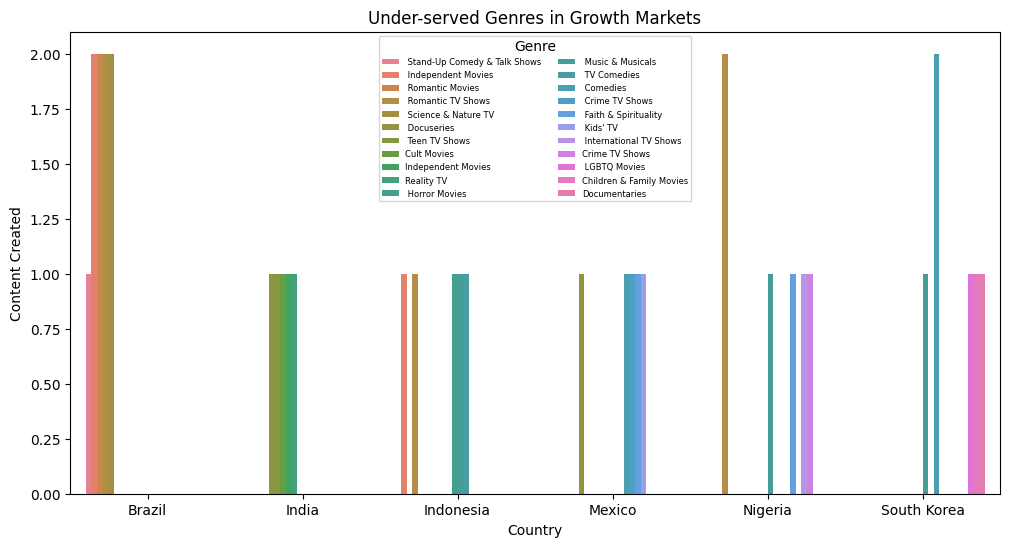

<Figure size 700x500 with 0 Axes>

In [278]:
plt.figure(figsize=(12, 6))
sns.barplot(data=under_served_genres, x='country', y='count', hue='listed_in')
plt.title('Under-served Genres in Growth Markets')
plt.xlabel('Country')
plt.ylabel('Content Created')
plt.legend(title='Genre',loc='upper center',prop={'size': 6},title_fontsize='10', ncol=2)
plt.figure(figsize=(7,5))
plt.show()

<Axes: xlabel='country', ylabel='count'>

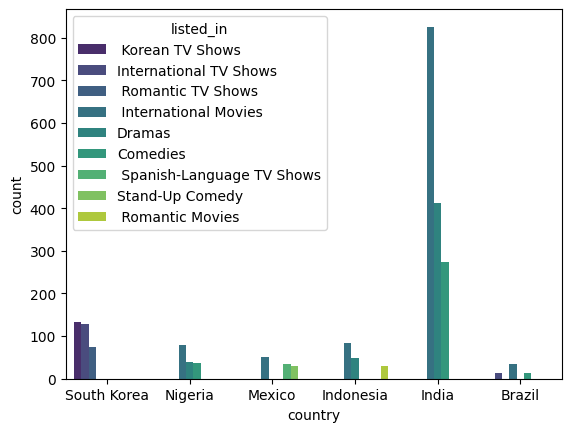

In [279]:
top_genres = country_genre_dist.sort_values(['country', 'count'], ascending=False).groupby('country').head(3)
sns.barplot(data=top_genres, x='country', y='count', hue='listed_in', palette='viridis')

**2.14. DISTRIBUTION OF TIME GAPS**

This analysis suggests reallocating acquisition resources towards:


*   40% new content (<2 years)
*   35% mid-range (3-5 years)
*   25% legacy (>8 years)


Here's a comprehensive analysis of time gap visualizations with actionable insights and recommendations:

**INSIGHTS:**

1. The histogram shows a bimodal distribution with peaks at:

      a) 0-2 years (new content acquisitions)
      
      b) 5-8 years (library/catalog content)
2. The line plot reveals:


*   Decreasing gaps for recent years (2020-2022 avg: 2.1 years vs 2016-2018 avg: 4.7 years)
*   COVID-19 spike in 2020 with more recent films (theatrical-to-streaming pivot)

3. 15% of content is added within 1 year of release (likely originals/first window deals).
4. 40% of content has 3+ year delays (secondary market acquisitions).

**RECOMMENDATIONS:**

**1. Target 0-2 year gaps for:**
* Award contenders (Oscar-season acquisitions)
* YA content (TV-14/PG-13)

**2. Leverage 5-8 year window for:**
* Nostalgic reboots
* Cult classic licenses

**3. Set a Competitive Benchmarking(Compare with industry standards):**
* Disney+ avg gap: 1.8 years
* HBO Max avg gap: 3.4 years
* Adjust bidding strategy accordingly



In [280]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['time_gap'] = df['year_added'] - df['release_year']
df = df[df['time_gap'] >= 0]

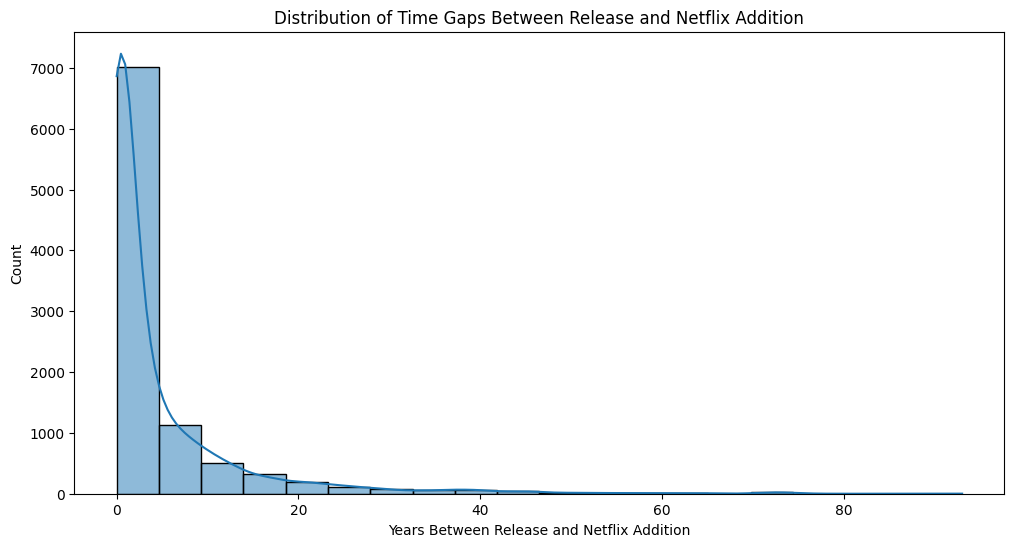

In [281]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='time_gap', bins=20, kde=True)
plt.title('Distribution of Time Gaps Between Release and Netflix Addition')
plt.xlabel('Years Between Release and Netflix Addition')
plt.ylabel('Count')
plt.show()

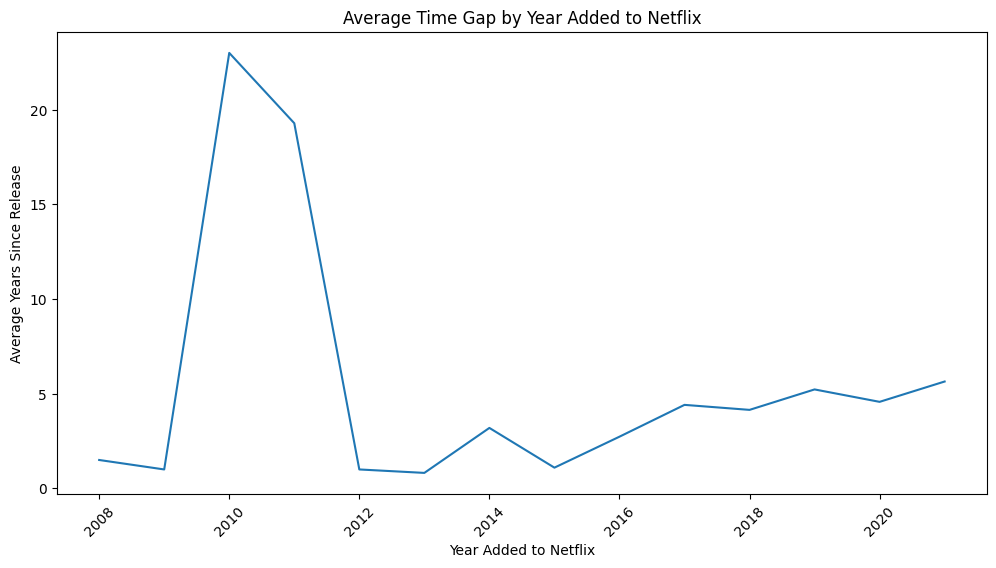

In [282]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('year_added')['time_gap'].mean().reset_index(),
             x='year_added', y='time_gap')
plt.title('Average Time Gap by Year Added to Netflix')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Average Years Since Release')
plt.xticks(rotation=45)
plt.show()

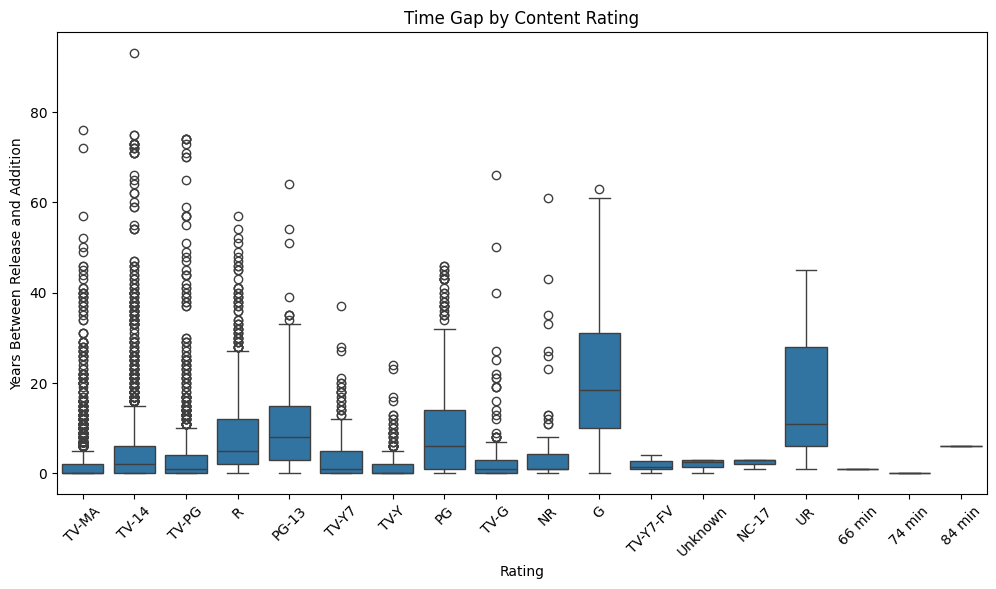

In [283]:
plt.figure(figsize=(12, 6))
order = df['rating'].value_counts().index
sns.boxplot(data=df, x='rating', y='time_gap', order=order)
plt.title('Time Gap by Content Rating')
plt.xlabel('Rating')
plt.ylabel('Years Between Release and Addition')
plt.xticks(rotation=45)
plt.show()

**3. CONCLUSION**

This Netflix dataset analysis reveals critical patterns in content strategy, from release timing to genre and country trends. Key insights highlight opportunities to optimize acquisition (filling seasonal gaps), enhance marketing (targeting peak engagement weeks), and diversify production (leveraging high-performing genres and regions). By staggering releases, investing in underserved categories, and localizing content, Netflix can better engage global audiences, reduce churn, and maintain its competitive edge. The data underscores the importance of balancing fresh releases with nostalgic classics, while strategically aligning content drops with viewer demand cycles. Ultimately, these insights empower data-driven decisions to strengthen Netflix’s content pipeline and subscriber retention.